In [2]:
import anndata as ad
import numpy as np
import pandas as pd
import scanpy as sc


In [1]:
adata = ad.read_h5ad("/scratch/bvdberg/SoloTE/scripts/bonemarrow_collection.h5ad")


NameError: name 'ad' is not defined

In [16]:
# adata = ad.read_h5ad("/scratch/bvdberg/SoloTE/scripts/testsubset.h5ad")
# adata.var.tail(100)
# Read in each matrix with their accompanying barcodes and features
adata1 = sc.read_mtx("/scratch/bvdberg/SoloTE/run_A018/A018_SoloTE_output/A018_locustes_MATRIX/matrix.mtx")
print(adata1.obs_names[:10])
print(adata1.var_names[:10])
barcode1 = pd.read_csv("/scratch/bvdberg/SoloTE/run_A018/A018_SoloTE_output/A018_locustes_MATRIX/barcodes.tsv", header=None, names=["barcode"])
feature1 = pd.read_csv("/scratch/bvdberg/SoloTE/run_A018/A018_SoloTE_output/A018_locustes_MATRIX/features.tsv", sep="\t", header=None, names=["gene_name"])

# To resolve a ValueError: Length of passed value for obs_names is 114950, but this AnnData has shape: (159348, 114950) 
# We transpose the data so the axis are swapped with each other so they correspond with the lenghts of the features and barcodes
adata1 = adata1.transpose()

# Allocate the features and barcodes to the respective annotation data
adata1.obs_names = barcode1["barcode"]
adata1.var_names = feature1["gene_name"]
print(adata1)


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')
AnnData object with n_obs × n_vars = 118288 × 156966


In [18]:
print( adata1.var.tail(10))


Empty DataFrame
Columns: []
Index: [SoloTE|chrY|90804592|90804705|B1_Mus2:Alu:SINE|19.1|-, SoloTE|chrY|90804713|90805946|L1_Mm:L1:LINE|25.1|-, SoloTE|chrY|90806301|90806444|B1_Mus2:Alu:SINE|18.8|-, SoloTE|chrY|90806863|90806976|B1_Mus2:Alu:SINE|19.1|-, SoloTE|chrY|90806984|90807239|L1_Mm:L1:LINE|6.2|-, SoloTE|chrY|90808180|90808635|L1_Mm:L1:LINE|8.4|-, SoloTE|chrY|90811149|90811351|RLTR40:ERVK:LTR|29.1|+, SoloTE|chrY|9646600|9650988|MuRRS-int:ERV1:LTR|17.7|-, SoloTE|chrY|9763455|9769662|L1Md_T:L1:LINE|4.2|-, SoloTE|chrY|9825878|9826873|L1Md_T:L1:LINE|5.9|+]


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


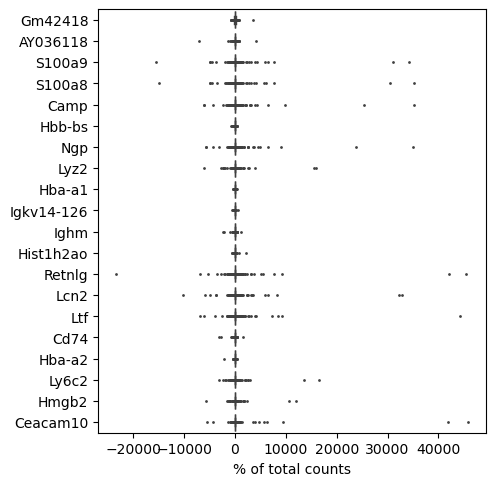

In [8]:
sc.pl.highest_expr_genes(adata, n_top=20, )


In [8]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


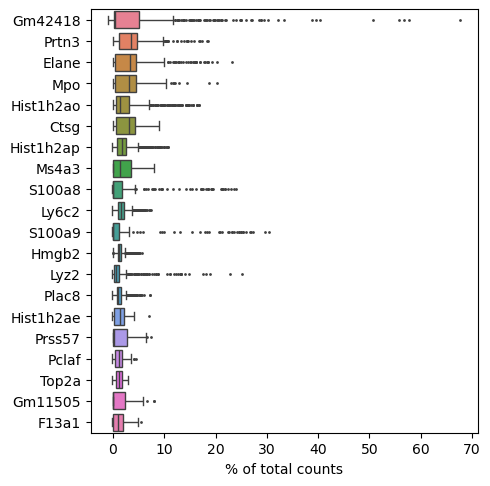

In [9]:
sc.pl.highest_expr_genes(adata, n_top=20, )


In [10]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


/mbshome/bvdberg/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:795: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  g = sns.catplot(


AttributeError: 'NoneType' object has no attribute 'get_legend_handles_labels'

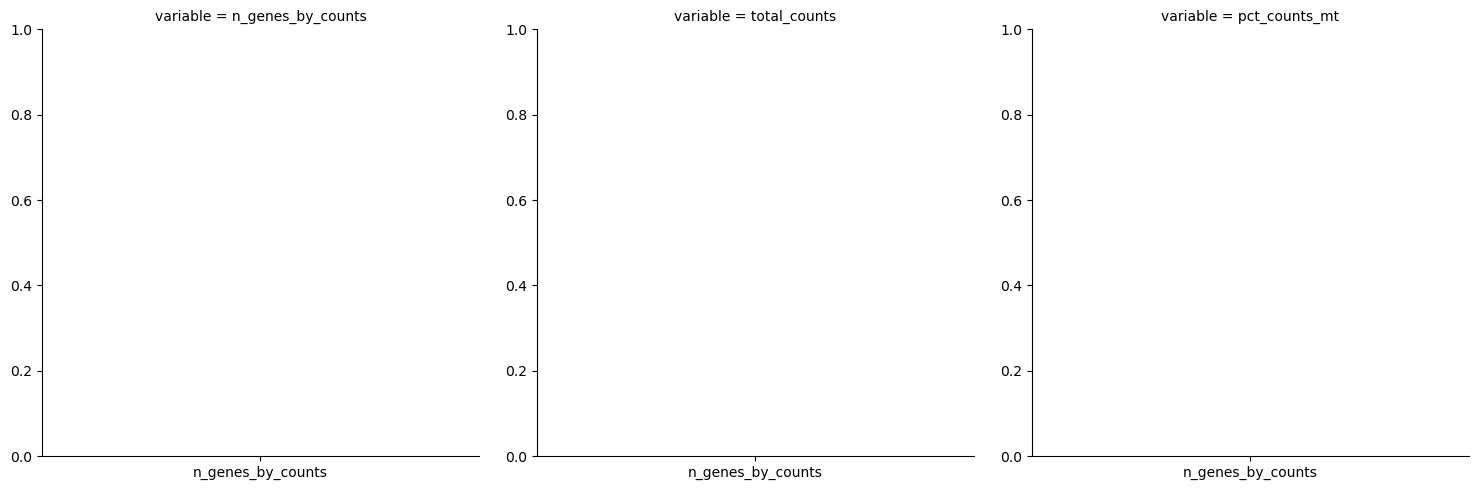

In [12]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True,density_norm='width')


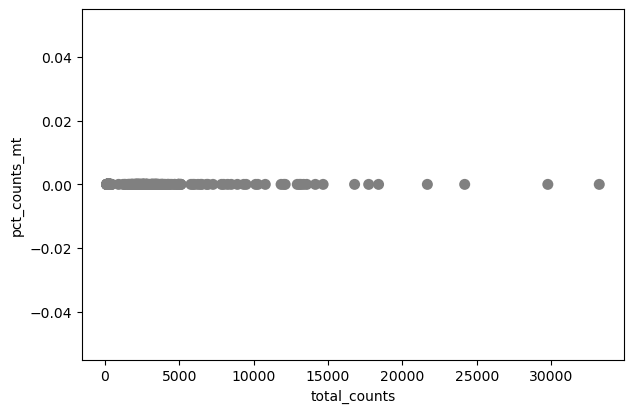

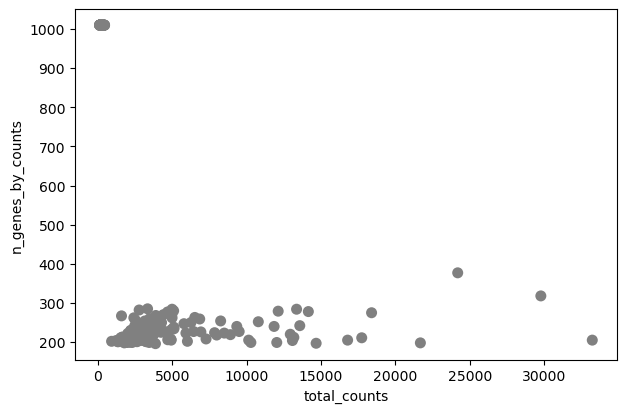

In [13]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')


In [ ]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]


In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)


In [ ]:
sc.pp.log1p(adata)


In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)


In [ ]:
sc.pl.highly_variable_genes(adata)


In [ ]:
adata.raw = adata


In [ ]:
adata = adata[:, adata.var.highly_variable]


In [ ]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])


In [ ]:
sc.pp.scale(adata, max_value=10)


In [ ]:
sc.tl.pca(adata, svd_solver='arpack')


In [ ]:
sc.pl.pca(adata, color='CST3')


In [ ]:
sc.pl.pca_variance_ratio(adata, log=True)


In [ ]:
#adata.write(results_file)


In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)


In [ ]:
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')


In [ ]:
sc.tl.umap(adata)


In [ ]:
sc.pl.umap(adata) # with color=["gene name"] you can color specific genes


In [ ]:
sc.pl.umap(adata,use_raw=False)


In [ ]:
sc.tl.leiden(adata)


In [ ]:
sc.pl.umap(adata) 


In [ ]:
#adata.write(results_file)


In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)


In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)


In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
